<a href="https://colab.research.google.com/github/A-Wadhwani/ME498-Project/blob/main/02_Features_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the following new variables

We previously made a stratified sample of the original dataset (50 buildings per type)

- Daycode: Weekday(0)/Weekend(1)/Holiday(2)
- Year
- Month of Year
- Day of Month
- Day of Week: Monday (0) to Sunday (6)
- Day of Year
- Hour of Day



In [77]:
# Open drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import tensorflow as tf
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import r2_score
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.4.1


In [79]:
df = pd.read_csv("drive/My Drive/ASHRAE_DATA/cleaned_data.csv", index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [80]:
df.head() 

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN,0,0.0
1,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN,0,0.0
2,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN,0,0.0
3,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN,0,0.0
4,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN,0,0.0


In [81]:
df['date_time'] = pd.to_datetime(df['timestamp'])
df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN,0,0.0,2016-01-01
1,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN,0,0.0,2016-01-01
2,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN,0,0.0,2016-01-01
3,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN,0,0.0,2016-01-01
4,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN,0,0.0,2016-01-01


In [82]:
df = df.drop(labels="timestamp", axis=1)
df.dtypes

site_id                        int64
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
building_id                    int64
primary_use                   object
square_feet                    int64
year_built                   float64
floor_count                  float64
meter                          int64
meter_reading                float64
date_time             datetime64[ns]
dtype: object

In [83]:
# Year, Month and Day 
df['Year'] = pd.DatetimeIndex(df['date_time']).year
df['Month'] = pd.DatetimeIndex(df['date_time']).month
df['Day_of_Month'] = pd.DatetimeIndex(df['date_time']).day
df['Day_of_Year'] = pd.DatetimeIndex(df['date_time']).dayofyear
df['Day_of_Week'] = pd.DatetimeIndex(df['date_time']).weekday
df['Hour'] = pd.DatetimeIndex(df['date_time']).hour

df.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour
0,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0
1,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0
2,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0
3,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0
4,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0


In [84]:
df[df["Day_of_Year"] == 78].head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour
199440,0,22.2,6.0,15.6,0.0,1015.1,10.0,6.2,0,Education,7432,2008.0,NaN,0,0.0,2016-03-18 00:00:00,2016,3,18,78,4,0
199565,0,21.1,NaN,15.6,0.0,1015.7,20.0,4.6,0,Education,7432,2008.0,NaN,0,0.0,2016-03-18 01:00:00,2016,3,18,78,4,1
199690,0,20.6,NaN,16.7,0.0,1016.1,40.0,2.1,0,Education,7432,2008.0,NaN,0,0.0,2016-03-18 02:00:00,2016,3,18,78,4,2
199815,0,20.0,NaN,16.7,0.0,1016.2,90.0,1.5,0,Education,7432,2008.0,NaN,0,0.0,2016-03-18 03:00:00,2016,3,18,78,4,3
199940,0,20.0,NaN,16.7,0.0,1015.4,80.0,1.5,0,Education,7432,2008.0,NaN,0,0.0,2016-03-18 04:00:00,2016,3,18,78,4,4


In [85]:
# Make weekdays 0 and weekends 1
df['Daycode'] = np.where(df["Day_of_Week"] >=5, 1, 0)

In [86]:
df[df["Day_of_Week"] == 4].head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour,Daycode
0,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0,0
1,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0,0
2,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0,0
3,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0,0
4,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN,0,0.0,2016-01-01,2016,1,1,1,4,0,0


In [87]:
df[df["Day_of_Week"] == 5].head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour,Daycode
2472,0,24.4,6.0,18.9,-1.0,1018.1,270.0,2.6,0,Education,7432,2008.0,NaN,0,0.0,2016-01-02 00:00:00,2016,1,2,2,5,0,1
2575,0,23.9,4.0,18.3,0.0,1018.5,300.0,2.1,0,Education,7432,2008.0,NaN,0,0.0,2016-01-02 01:00:00,2016,1,2,2,5,1,1
2677,0,22.2,NaN,19.4,0.0,NaN,360.0,5.7,0,Education,7432,2008.0,NaN,0,0.0,2016-01-02 02:00:00,2016,1,2,2,5,2,1
2779,0,21.1,NaN,18.9,0.0,1019.5,20.0,5.1,0,Education,7432,2008.0,NaN,0,0.0,2016-01-02 03:00:00,2016,1,2,2,5,3,1
2881,0,20.6,NaN,17.8,0.0,1019.4,30.0,4.6,0,Education,7432,2008.0,NaN,0,0.0,2016-01-02 04:00:00,2016,1,2,2,5,4,1


## Adding Holidays
If the date is a holiday, the `Daycode` is set to 2


In [88]:
holidays = pd.read_csv("https://gist.githubusercontent.com/shivaas/4758439/raw/b0d3ddec380af69930d0d67a9e0519c047047ff8/US%2520Bank%2520holidays", names=["Count", "Date", "Name"], date_parser=["Date"])
holidays ['Date'] = pd.to_datetime(holidays['Date'])
holidays.head()

,Count,Date,Name
0,1,2012-01-02,New Year Day
1,2,2012-01-16,Martin Luther King Jr. Day
2,3,2012-02-20,Presidents Day (Washingtons Birthday)
3,4,2012-05-28,Memorial Day
4,5,2012-07-04,Independence Day


In [89]:
holidays.dtypes

Count             int64
Date     datetime64[ns]
Name             object
dtype: object

In [90]:
df['Daycode'] = np.where(df["date_time"].dt.date.isin(holidays["Date"].dt.date) , 2, df["Daycode"])
df[df["Day_of_Year"] == 361].head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,date_time,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour,Daycode
1058230,0,23.3,4.0,18.9,0.0,1025.4,70.0,4.1,0,Education,7432,2008.0,NaN,0,207.498,2016-12-26 00:00:00,2016,12,26,361,0,0,0
1058358,0,21.7,2.0,18.3,0.0,1025.9,70.0,3.1,0,Education,7432,2008.0,NaN,0,223.197,2016-12-26 01:00:00,2016,12,26,361,0,1,0
1058486,0,21.1,0.0,18.9,0.0,1026.3,60.0,3.1,0,Education,7432,2008.0,NaN,0,224.562,2016-12-26 02:00:00,2016,12,26,361,0,2,0
1058614,0,20.6,2.0,18.9,0.0,1026.9,60.0,2.6,0,Education,7432,2008.0,NaN,0,230.705,2016-12-26 03:00:00,2016,12,26,361,0,3,0
1058742,0,20.6,2.0,18.9,0.0,1026.8,70.0,3.1,0,Education,7432,2008.0,NaN,0,238.214,2016-12-26 04:00:00,2016,12,26,361,0,4,0


In [91]:
df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,square_feet,year_built,floor_count,meter,meter_reading,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour,Daycode
count,1.528459e+06,1.528050e+06,892199.000000,1.527968e+06,1.389866e+06,1.466652e+06,1.469643e+06,1.527470e+06,1.528459e+06,1.528459e+06,971809.00000,193632.000000,1528459.0,1.528459e+06,1528459.0,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06
mean,3.888058e+00,1.913292e+01,2.760858,1.081322e+01,9.534344e-01,1.016535e+03,1.686653e+02,3.535024e+00,4.131559e+02,9.226391e+04,1988.47066,2.515865,0.0,1.491991e+02,2016.0,6.523166e+00,1.575911e+01,1.837933e+02,3.007983e+00,1.150148e+01,3.388838e-01
std,4.860230e+00,9.854534e+00,2.431229,9.853717e+00,9.807406e+00,6.231346e+00,1.138731e+02,2.259507e+00,4.330042e+02,1.297422e+05,24.30009,1.889237,0.0,2.909073e+02,0.0,3.453189e+00,8.809439e+00,1.057348e+02,1.997943e+00,6.922625e+00,5.279992e-01
min,0.000000e+00,-2.890000e+01,0.000000,-3.170000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.00000,1.000000,0.0,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.330000e+01,0.000000,3.900000e+00,0.000000e+00,1.013000e+03,7.000000e+01,2.100000e+00,4.800000e+01,1.641100e+04,1976.00000,1.000000,0.0,9.841000e+00,2016.0,4.000000e+00,8.000000e+00,9.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00
50%,2.000000e+00,2.060000e+01,2.000000,1.220000e+01,0.000000e+00,1.016800e+03,1.700000e+02,3.100000e+00,2.180000e+02,4.273100e+04,1997.00000,2.000000,0.0,5.323970e+01,2016.0,7.000000e+00,1.600000e+01,1.840000e+02,3.000000e+00,1.200000e+01,0.000000e+00
75%,5.000000e+00,2.610000e+01,4.000000,1.890000e+01,0.000000e+00,1.020400e+03,2.700000e+02,4.600000e+00,6.750000e+02,9.970000e+04,2006.00000,4.000000,0.0,1.572755e+02,2016.0,1.000000e+01,2.300000e+01,2.750000e+02,5.000000e+00,1.800000e+01,1.000000e+00
max,1.500000e+01,4.720000e+01,9.000000,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,1.364000e+03,8.195770e+05,2016.00000,6.000000,0.0,4.521000e+03,2016.0,1.200000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,2.000000e+00


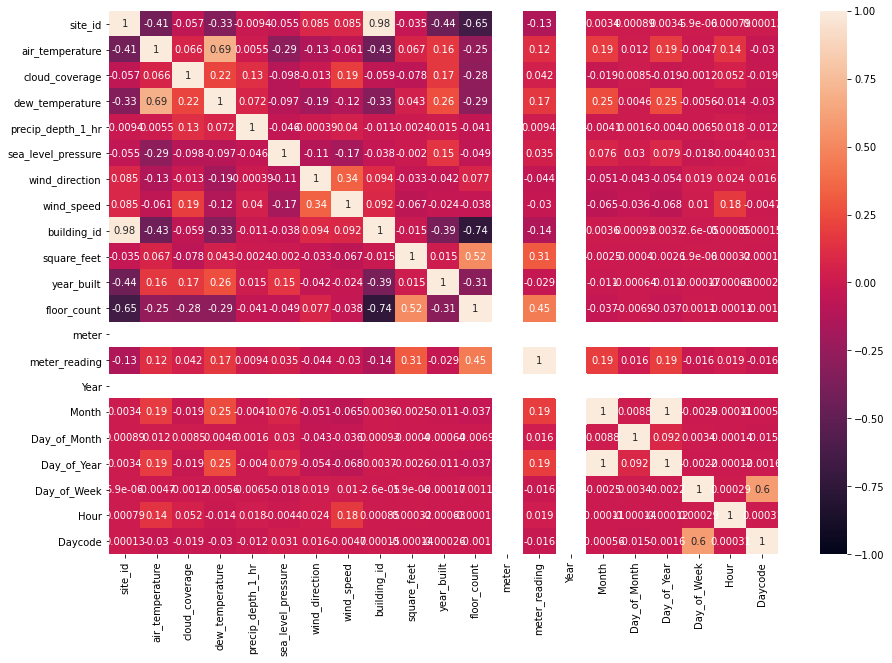

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

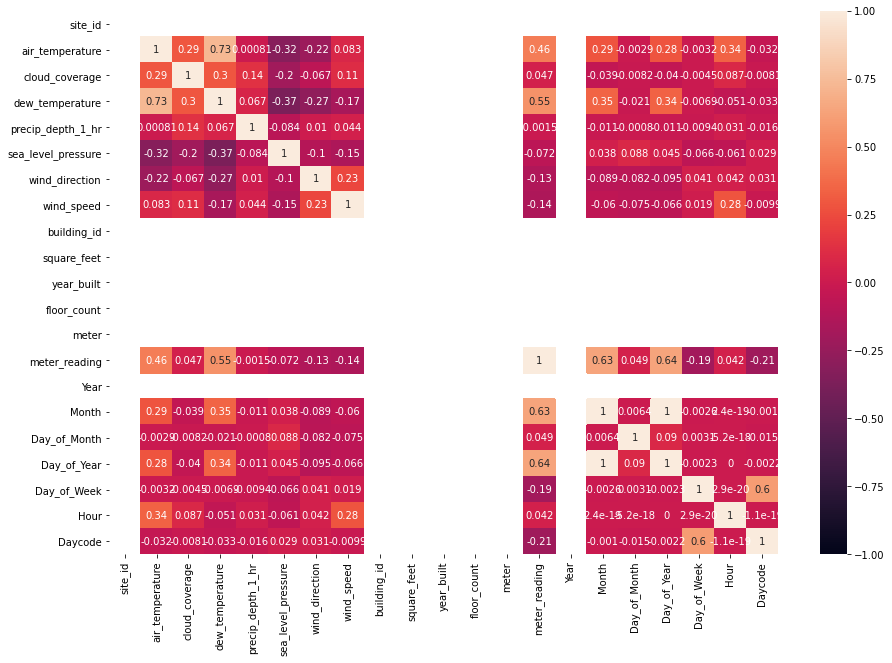

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(df[df["building_id"] == 25].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

### Cleaning current columns

In [94]:
df = df.drop(["meter", "precip_depth_1_hr", "cloud_coverage"], axis=1)


In [95]:
df.describe()

,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,building_id,square_feet,year_built,floor_count,meter_reading,Year,Month,Day_of_Month,Day_of_Year,Day_of_Week,Hour,Daycode
count,1.528459e+06,1.528050e+06,1.527968e+06,1.466652e+06,1.469643e+06,1.527470e+06,1.528459e+06,1.528459e+06,971809.00000,193632.000000,1.528459e+06,1528459.0,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06,1.528459e+06
mean,3.888058e+00,1.913292e+01,1.081322e+01,1.016535e+03,1.686653e+02,3.535024e+00,4.131559e+02,9.226391e+04,1988.47066,2.515865,1.491991e+02,2016.0,6.523166e+00,1.575911e+01,1.837933e+02,3.007983e+00,1.150148e+01,3.388838e-01
std,4.860230e+00,9.854534e+00,9.853717e+00,6.231346e+00,1.138731e+02,2.259507e+00,4.330042e+02,1.297422e+05,24.30009,1.889237,2.909073e+02,0.0,3.453189e+00,8.809439e+00,1.057348e+02,1.997943e+00,6.922625e+00,5.279992e-01
min,0.000000e+00,-2.890000e+01,-3.170000e+01,9.682000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.00000,1.000000,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.330000e+01,3.900000e+00,1.013000e+03,7.000000e+01,2.100000e+00,4.800000e+01,1.641100e+04,1976.00000,1.000000,9.841000e+00,2016.0,4.000000e+00,8.000000e+00,9.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00
50%,2.000000e+00,2.060000e+01,1.220000e+01,1.016800e+03,1.700000e+02,3.100000e+00,2.180000e+02,4.273100e+04,1997.00000,2.000000,5.323970e+01,2016.0,7.000000e+00,1.600000e+01,1.840000e+02,3.000000e+00,1.200000e+01,0.000000e+00
75%,5.000000e+00,2.610000e+01,1.890000e+01,1.020400e+03,2.700000e+02,4.600000e+00,6.750000e+02,9.970000e+04,2006.00000,4.000000,1.572755e+02,2016.0,1.000000e+01,2.300000e+01,2.750000e+02,5.000000e+00,1.800000e+01,1.000000e+00
max,1.500000e+01,4.720000e+01,2.610000e+01,1.045500e+03,3.600000e+02,1.900000e+01,1.364000e+03,8.195770e+05,2016.00000,6.000000,4.521000e+03,2016.0,1.200000e+01,3.100000e+01,3.660000e+02,6.000000e+00,2.300000e+01,2.000000e+00


In [96]:
column_means = df.median()
df1 = df.fillna(column_means)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


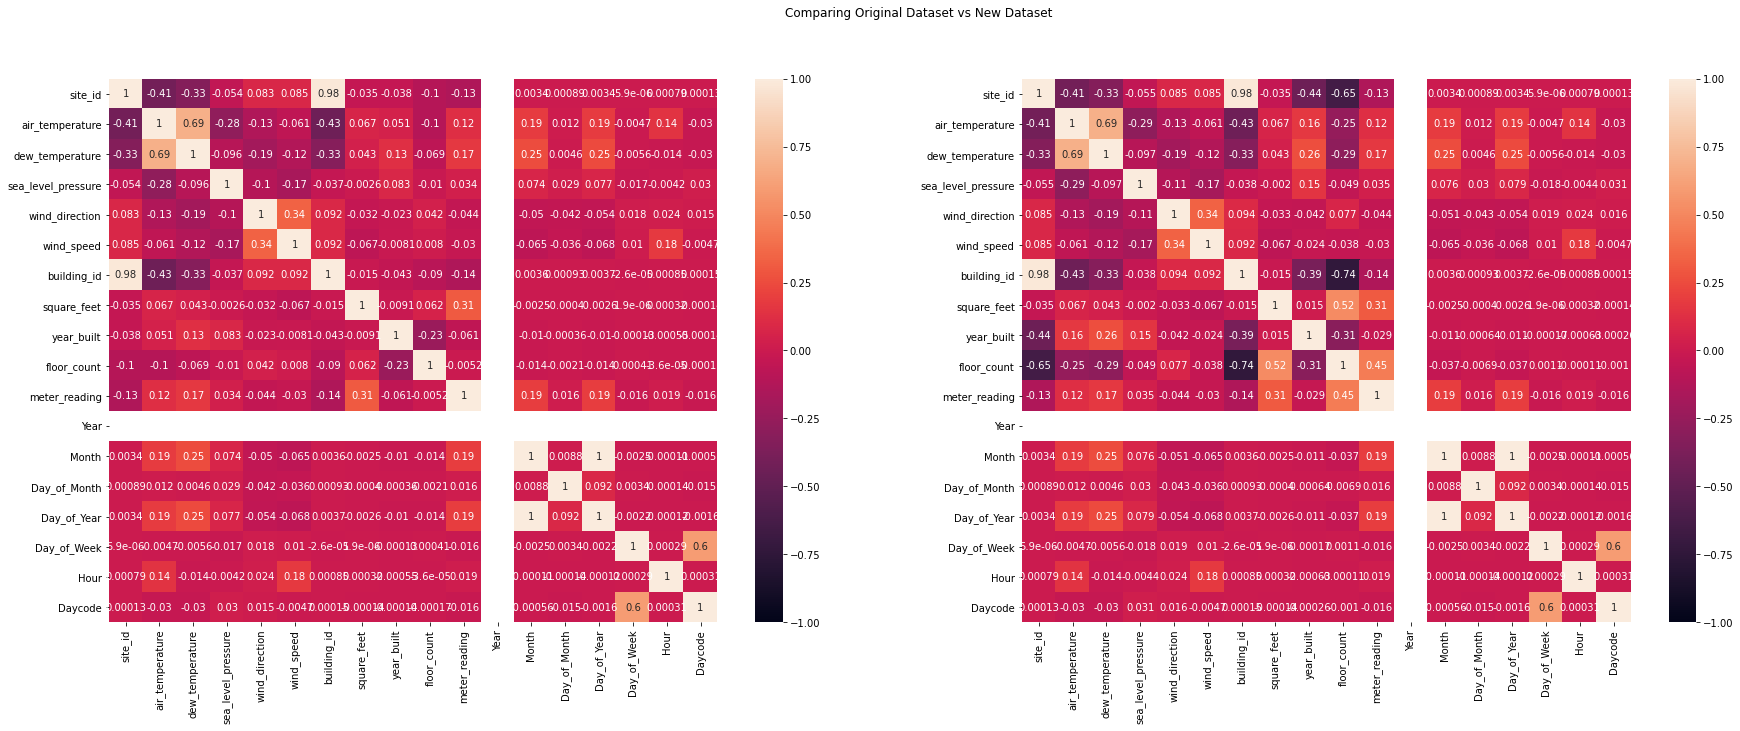

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
fig.suptitle('Comparing Original Dataset vs New Dataset')
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax2)
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, ax=ax1)
plt.show()

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528459 entries, 0 to 20125450
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   site_id             1528459 non-null  int64         
 1   air_temperature     1528459 non-null  float64       
 2   dew_temperature     1528459 non-null  float64       
 3   sea_level_pressure  1528459 non-null  float64       
 4   wind_direction      1528459 non-null  float64       
 5   wind_speed          1528459 non-null  float64       
 6   building_id         1528459 non-null  int64         
 7   primary_use         1528459 non-null  object        
 8   square_feet         1528459 non-null  int64         
 9   year_built          1528459 non-null  float64       
 10  floor_count         1528459 non-null  float64       
 11  meter_reading       1528459 non-null  float64       
 12  date_time           1528459 non-null  datetime64[ns]
 13  Year       

In [99]:
df1.to_csv("drive/My Drive/ASHRAE_DATA/modified_data.csv")

In [104]:
# Convert primary_use from categorical to numerical
le = LabelEncoder()
le.fit(df1['primary_use'])
print(le.classes_)
df1['primary_use'] = le.transform(df1['primary_use'])

['Education' 'Entertainment/public assembly' 'Food sales and service'
 'Healthcare' 'Lodging/residential' 'Manufacturing/industrial' 'Office'
 'Other' 'Parking' 'Public services' 'Religious worship' 'Retail'
 'Services' 'Technology/science' 'Utility' 'Warehouse/storage']


## Spliting into Training and Testing Sets

In [105]:
X = df1.drop(["meter_reading", "date_time"], axis=1)
y = df1["meter_reading"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [107]:
path = "drive/My Drive/ASHRAE_DATA/"
X_train.to_csv(path + "x_train.csv")
X_test.to_csv(path + "x_test.csv")
y_train.to_csv(path + "y_train.csv")
y_test.to_csv(path + "y_test.csv")